## Testing hypotheses: essentials

### Samples maximum from sampling without replacement

$$
 X_k\equiv\text{The number you draw on the }k\text{-th draw.} \\
 T_k\equiv\max(X_1,X_2, \ldots, X_k)
$$

And

$$
P(T_k\leq i)=\frac{i-(k-1)}{N-\text{(}k-1)}\cdot\ldots\cdot\frac{i-2}{N-2} \frac{i-1}{N-1}\cdot\frac{i}{N}
$$

In [49]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#mpl.rc('lines', linewidth=2, color='r')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 6)
#sns.set_context('paper', font_scale=1.5)

In [51]:
data = [61, 19, 56, 24, 16]

In [52]:
# Observed maximum
max(data)

61

In [53]:
def prob_max_sampling_wo_replacement(N, i, k=5):
    return (i - (k-1))/(N - (k-1)) * (i - (k-2))/(N - (k-2)) * (i - (k-3))/(N - (k-3)) * (i - (k-4))/(N - (k-4)) * (i - (k-5))/(N - (k-5))

In [54]:
prob_max_sampling_wo_replacement(350, 61)

0.00013988065505765124

In [55]:
prob_max_sampling_wo_replacement(N=80, i=61)

0.24746851250015806

In [56]:
t = np.linspace(start=61, stop=350, num=20)
t

array([  61.        ,   76.21052632,   91.42105263,  106.63157895,
        121.84210526,  137.05263158,  152.26315789,  167.47368421,
        182.68421053,  197.89473684,  213.10526316,  228.31578947,
        243.52631579,  258.73684211,  273.94736842,  289.15789474,
        304.36842105,  319.57894737,  334.78947368,  350.        ])

In [57]:
# Probability of committing type I error with null hypotheses N = 350
type_1_N350 = prob_max_sampling_wo_replacement(N=350, i=t)
type_1_N350

array([  1.39880655e-04,   4.40610509e-04,   1.11956413e-03,
         2.45605013e-03,   4.84192042e-03,   8.80071385e-03,
         1.50067998e-02,   2.43045220e-02,   3.77273417e-02,
         5.65169819e-02,   8.21425705e-02,   1.16319784e-01,
         1.61029991e-01,   2.18539397e-01,   2.91418187e-01,
         3.82559667e-01,   4.95199412e-01,   6.32934407e-01,
         7.99742191e-01,   1.00000000e+00])

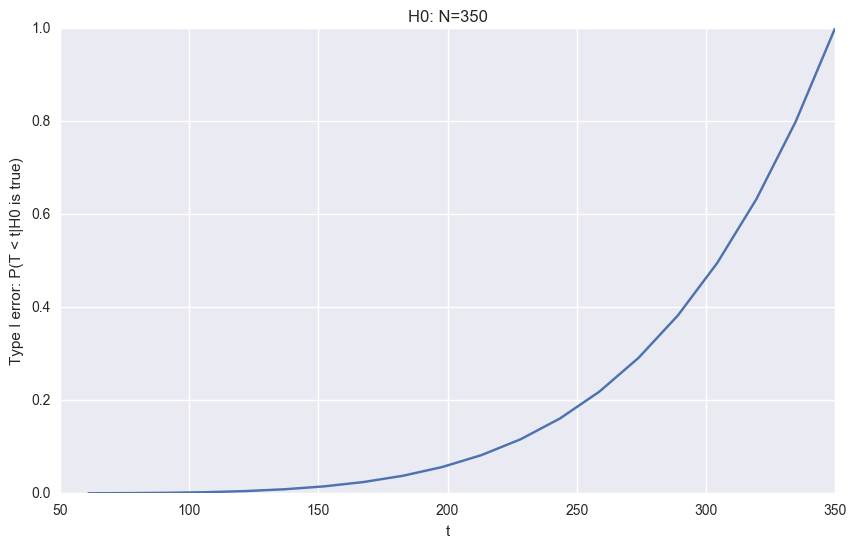

In [72]:
# plot of type I error for test statistics up to 350

#plt.figure(figsize=(12, 8))
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
ax1.plot(t, type_1_N350)
ax1.set_xlabel('t')
ax1.set_ylabel('Type I error: P(T < t|H0 is true)')
ax1.set_title('H0: N=350')


In [59]:
# Set up interpolation of the inverse function for the Probability of committing type I error.
x = np.linspace(start=61, stop=350, num=1000)
y = prob_max_sampling_wo_replacement(N=350, i=x)
inv = interpolate.interp1d(y, x)

In [60]:
inv(0.2)

array(254.22516219566867)

In [61]:
inv(1)

array(350.0)

Suppose we set $\alpha = 0.05$. At what threshold value $t_5 = \text{max} (x_1, x_2, x_3, x_4, x_5)$ would we just reject $H_0: N=350$ in favor of $H_1: N < 350$?

In [62]:
#threshold
inv(0.05)

array(193.1530584407293)

$$
P(T_5 \leq 193| N= 350) \approx 0.05 \Rightarrow \text{ Critical Value } = 193
$$

In [63]:
# Probability of committing type I error with null hypotheses N = 80
t2 = np.linspace(start=20, stop=80, num=20)
type_1_N80 = prob_max_sampling_wo_replacement(N=80, i=t2)

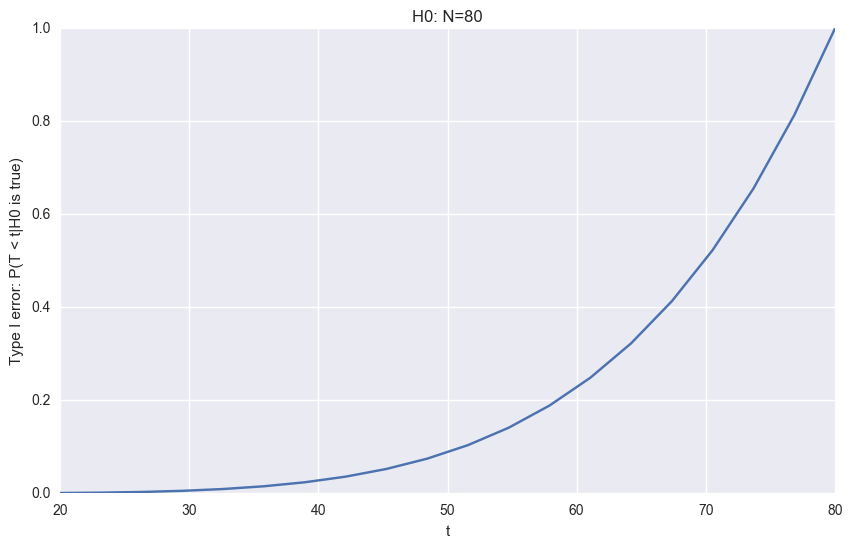

In [73]:
# plot of type I error for test statistics up to 80

fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
ax2.plot(t2, type_1_N80)
ax2.set_xlabel('t')
ax2.set_ylabel('Type I error: P(T < t|H0 is true)')
ax2.set_title('H0: N=80')

In [65]:
# Set up interpolation of the inverse function for the Probability of committing type I error.
x2 = np.linspace(start=20, stop=80, num=1000)
y2 = prob_max_sampling_wo_replacement(N=80, i=x2)
inv2 = interpolate.interp1d(y2, x2)

Suppose we set $\alpha = 0.05$. At what threshold value $t_5 = \text{max} (x_1, x_2, x_3, x_4, x_5)$ would we just reject $H_0: N=80$ in favor of $H_1: N < 80$?

In [66]:
# threshold
inv2(0.05)

array(44.86015252734399)

$$
P(T_5 \leq 44.8| N= 80) \approx 0.05 \Rightarrow \text{ Critical Value } = 44.8
$$

## Type II Errors

### Samples maximum from sampling without replacement

$$
 X_k\equiv\text{The number you draw on the }k\text{-th draw.} \\
 T_k\equiv\max(X_1,X_2, \ldots, X_k)
$$

And

$$
P(T_k\leq i)=\frac{i-(k-1)}{N-\text{(}k-1)}\cdot\ldots\cdot\frac{i-2}{N-2} \frac{i-1}{N-1}\cdot\frac{i}{N}
$$

Then

$$
P(T_k \geq i) = 1 - P(T_k\leq i)
$$

In [67]:
def typeII_error(N, i, k=5):
    return 1 - prob_max_sampling_wo_replacement(N, i, k=5)

In [68]:
N = np.linspace(start=193, stop=400, num=100)

In [69]:
typeII = typeII_error(N, i=193, k=5)

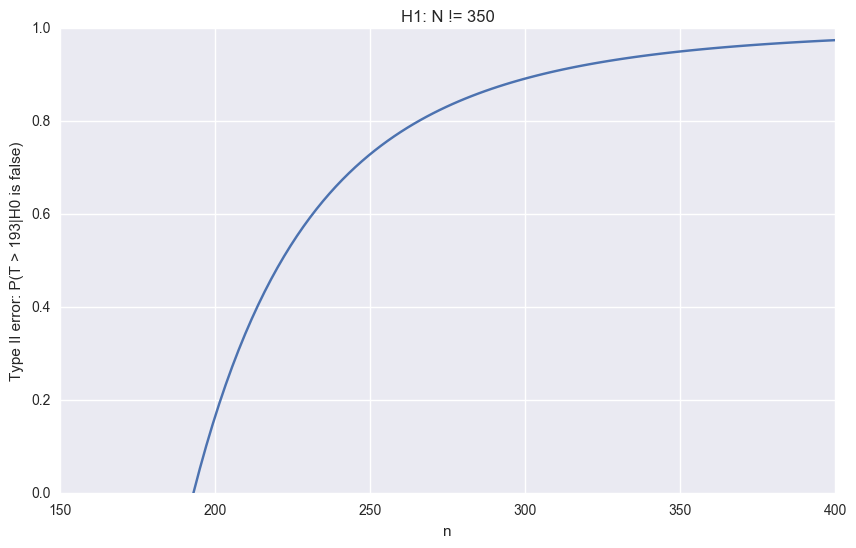

In [75]:
# plot of type II error for threshold value t5 = 193.

fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111)
ax3.plot(N, typeII)
ax3.set_xlabel('n')
ax3.set_ylabel('Type II error: P(T > 193|H0 is false)')
ax3.set_title('H1: N != 350')

In [71]:
#typeII_error(350, i=193, k=5)

In [79]:
# Save the type II error figure - uncomment to update file
#fig3.savefig('typeII.png', dpi=180)